In [297]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/home-data-for-ml-course/train.csv
/kaggle/input/home-data-for-ml-course/train.csv.gz
/kaggle/input/home-data-for-ml-course/sample_submission.csv.gz
/kaggle/input/home-data-for-ml-course/test.csv.gz
/kaggle/input/home-data-for-ml-course/test.csv
/kaggle/input/home-data-for-ml-course/sample_submission.csv
/kaggle/input/home-data-for-ml-course/data_description.txt


In [298]:
#Loading dataset

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

prepath = "/kaggle/input/home-data-for-ml-course/{0}"
home_data = pd.read_csv(prepath.format("train.csv"))
test_data = pd.read_csv(prepath.format("test.csv"))
test_tmp = pd.read_csv(prepath.format("test.csv"))

In [299]:
home_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [300]:
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [301]:
#PREPROCESSING: NaN's are being changed to new category None https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html
rep_categ='None'

list_nans_cols = lambda table, types: set(table.select_dtypes(include=types).isnull().sum()[table.select_dtypes(include=types).isnull().sum()>0].keys())
obj_cols = list_nans_cols(home_data, ['object']).union(list_nans_cols(test_data, ['object']))
for col in obj_cols:
    test_data[col]=test_data[col].fillna(rep_categ)
    home_data[col]=home_data[col].fillna(rep_categ)


In [302]:
#PREPROCESSING: The same, but this time with numeric types
num_cols = list_nans_cols(home_data, ['int','float']).union(list_nans_cols(test_data, ['int','float']))
for col in num_cols:
    
    test_data[col]=test_data[col].fillna(test_data[col].median())
    home_data[col]=home_data[col].fillna(home_data[col].median())

In [303]:
home_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,12,2008,WD,Normal,250000


In [304]:
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,None,Reg,Lvl,AllPub,...,120,0,None,MnPrv,None,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,None,IR1,Lvl,AllPub,...,0,0,None,None,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,None,IR1,Lvl,AllPub,...,0,0,None,MnPrv,None,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,None,IR1,Lvl,AllPub,...,0,0,None,None,None,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,None,IR1,HLS,AllPub,...,144,0,None,None,None,0,1,2010,WD,Normal


In [305]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=[30,15])
#Heatmap lookup
#https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b
# One of the assumptions of linear regression is that the independent variables need to be uncorrelated with each other.
#If these variables are correlated with each other, then we need to keep only one of them and drop the rest.
sns.heatmap(home_data.corr(), annot=True)

<Figure size 2160x1080 with 0 Axes>

<Figure size 2160x1080 with 0 Axes>

In [306]:
drop = ['GarageArea','1stFlrSF','TotRmsAbvGrd'] 
#Some drops from heatmap
home_data.drop(drop, axis=1, inplace=True)
test_data.drop(drop, axis=1, inplace=True)

In [307]:
#cut outliners
def prhist(tag):       
    bins=40
    plt.hist(test_data[tag], bins, alpha=0.8, label='x')
    plt.hist(home_data[tag], bins, alpha=0.8, label='y')
    plt.legend(loc='upper right')
    plt.show()


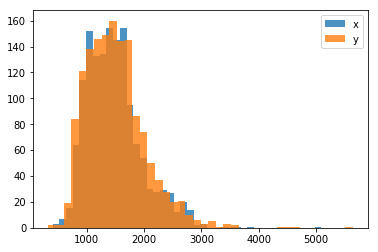

In [308]:
prhist('GrLivArea')

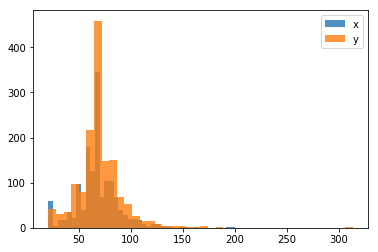

In [309]:
prhist('LotFrontage')

In [310]:
#In general, it is worth to check another variables.
home_data = home_data[home_data['GrLivArea']<4000]
home_data = home_data[home_data['LotFrontage']<300]

In [311]:
home_data.drop('Id', axis=1, inplace=True)
test_data.drop('Id', axis=1, inplace=True)

In [312]:
home_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,...,0,None,None,None,0,12,2008,WD,Normal,250000


In [313]:
test_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,None,Reg,Lvl,AllPub,Inside,...,120,0,None,MnPrv,None,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,None,IR1,Lvl,AllPub,Corner,...,0,0,None,None,Gar2,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,None,IR1,Lvl,AllPub,Inside,...,0,0,None,MnPrv,None,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,None,IR1,Lvl,AllPub,Inside,...,0,0,None,None,None,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,None,IR1,HLS,AllPub,Inside,...,144,0,None,None,None,0,1,2010,WD,Normal


In [314]:
#these strings which are represented as numeric should be replaced with strings
home_data['MSSubClass']=home_data['MSSubClass'].astype(str)
test_data['MSSubClass']=test_data['MSSubClass'].astype(str)

#and these which are strings and should be numeric
#https://www.kaggle.com/learn-forum/61087

#this will be problematic
#home_data = pd.get_dummies(home_data)
#test_data = pd.get_dummies(test_data)

#the solution is to temporary merge them, do get_dummies and split to old forms.
train_size = home_data.shape[0]
tmp = pd.concat([home_data,test_data], sort=False)
tmp = pd.get_dummies(tmp)
home_data=tmp[:train_size]
test_data=tmp[train_size:]

In [315]:
X=home_data.drop('SalePrice', axis=1)
Y=home_data['SalePrice']

In [316]:
Y = np.log(Y)

In [317]:
home_data.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_New,SaleType_None,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,150.0,...,0,0,0,1,0,0,0,0,1,0
1,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,284.0,...,0,0,0,1,0,0,0,0,1,0
2,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,434.0,...,0,0,0,1,0,0,0,0,1,0
3,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,540.0,...,0,0,0,1,1,0,0,0,0,0
4,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,490.0,...,0,0,0,1,0,0,0,0,1,0


In [318]:
test_data.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_New,SaleType_None,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,270.0,...,0,0,0,1,0,0,0,0,1,0
1,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,406.0,...,0,0,0,1,0,0,0,0,1,0
2,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,137.0,...,0,0,0,1,0,0,0,0,1,0
3,78.0,9978,6,6,1998,1998,20.0,602.0,0.0,324.0,...,0,0,0,1,0,0,0,0,1,0
4,43.0,5005,8,5,1992,1992,0.0,263.0,0.0,1017.0,...,0,0,0,1,0,0,0,0,1,0


In [319]:
rfmodel = None
curr_best = 0

rfmodel = RandomForestRegressor(n_estimators=6000, n_jobs=-1, oob_score=True,  max_features = 0.5,
                             min_samples_leaf = 2, random_state=0)
rfmodel.fit(X, Y)
rfmodel.score(X, Y)

KeyboardInterrupt: 

In [ ]:
test_X = test_data.drop('SalePrice', axis=1)
test_preds = rfmodel.predict(test_X)
output = pd.DataFrame({'Id': test_tmp.Id,
                       'SalePrice': np.exp(test_preds)})
output.to_csv('submission.csv', index=False)